In [33]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Activation, MaxPooling2D, Flatten, Dropout
from keras import layers, optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as pyplot
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

In [34]:
sample_path = './data/sample'
train_path = './data/train'
validation_path = './data/validation'
test_path = './data/test'
# dimensions of our images.
img_width, img_height = 150, 150
target_size = (img_width, img_width)
input_shape = (img_width, img_width, 3)

nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

In [35]:
data_gen = ImageDataGenerator(rescale=1. / 255,
                              horizontal_flip=True,
                              shear_range=0.2,
                              zoom_range=0.2,
                              rotation_range=40,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              fill_mode='nearest'
                             )

In [36]:
sample_images = data_gen.flow_from_directory(directory=sample_path, target_size=target_size, class_mode='binary')
train_images = data_gen.flow_from_directory(directory=train_path, target_size=target_size, class_mode='binary')
validation_images = data_gen.flow_from_directory(directory=validation_path, target_size=target_size, class_mode='binary' )

Found 22 images belonging to 2 classes.
Found 17778 images belonging to 2 classes.
Found 7222 images belonging to 2 classes.


### Let's check some sample images

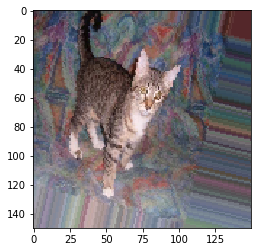

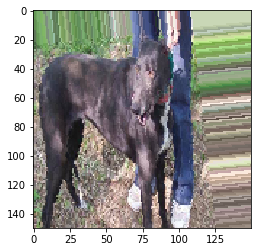

In [37]:
photos = []
for X_batch, y_batch in sample_images:
    i=0
    while i < 2:
        photos.append(X_batch[i])
        pyplot.imshow(X_batch[i])
        pyplot.show()
        i=i+1
    break

### Build the model

In [38]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    
__________

### Now let's train the model

In [40]:
history = model.fit_generator(
    train_images,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_images,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/50
125/125 [==============================] - 71s - loss: 0.6896 - acc: 0.5367 - val_loss: 0.6754 - val_acc: 0.5444
Epoch 2/50
125/125 [==============================] - 71s - loss: 0.6757 - acc: 0.5722 - val_loss: 0.6624 - val_acc: 0.6169
Epoch 3/50
125/125 [==============================] - 71s - loss: 0.6677 - acc: 0.5865 - val_loss: 0.7102 - val_acc: 0.5400
Epoch 4/50
125/125 [==============================] - 72s - loss: 0.6528 - acc: 0.6088 - val_loss: 0.6433 - val_acc: 0.6206
Epoch 5/50
125/125 [==============================] - 71s - loss: 0.6377 - acc: 0.6283 - val_loss: 0.6185 - val_acc: 0.6761
Epoch 6/50
125/125 [==============================] - 71s - loss: 0.6253 - acc: 0.6573 - val_loss: 0.6005 - val_acc: 0.6787
Epoch 7/50
125/125 [==============================] - 71s - loss: 0.6196 - acc: 0.6515 - val_loss: 0.6196 - val_acc: 0.6412
Epoch 8/50
125/125 [==============================] - 71s - loss: 0.6102 - acc: 0.6573 - val_loss: 0.5775 - val_acc: 0.6913
Epoch 9/

In [41]:
model.save('cats-n-dogs_basic_model.h5')

#### Plot the training data prediction accuracy and validation data prediction accuracy
Divergence in acc and val_acc would indicate overfitting

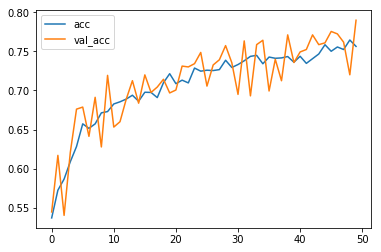

In [42]:
model = load_model('cats-n-dogs_basic_model.h5')
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.legend(['acc', 'val_acc'])
pyplot.show()

### Now let's predict using our trained model

In [43]:
def predict(image):
    im_np = np.asarray(image)
    im_array=np.expand_dims(im_np, axis=0) # need to do this since model.predict_classes takes array of images as input
    result = model.predict_classes(im_array)
    if result[0] == 1:
        return 'Dog'
    else:
        return 'Cat'

### Predict using a file from file system

1/1 [==============================] - 0s
Dog


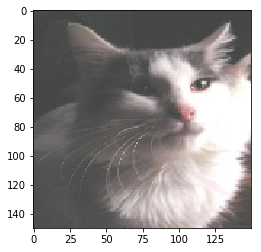

In [44]:
from PIL import Image

image_path = test_path + '/' + '12363.jpg'
pil_im = Image.open(image_path)
im = pil_im.resize((150,150))
pyplot.imshow(im)

print(predict(im))

### Predict using an image from a URL

1/1 [==============================] - 0s
Dog


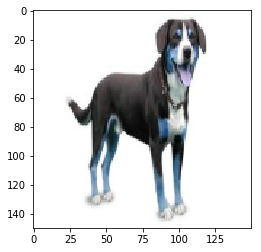

In [45]:
import urllib
import cv2

def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.resize(image, (150,150))
    return image

cat_image = 'http://www.ottawafamilyliving.com/wp-content/uploads/2017/05/cat.jpg'
dog_image = 'http://cdn3-www.dogtime.com/assets/uploads/2011/01/file_23262_entlebucher-mountain-dog-300x189.jpg'

image = url_to_image(dog_image)

pyplot.imshow(image)

print(predict(image))